In [1]:
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
from os.path import dirname
from os import getcwd
import sys

sys.path.append(dirname(getcwd()))

from src.graphs.matchday_graph import MatchDayGraph

In [2]:
now = datetime.now()
today = datetime(now.year, now.month, now.day) # set time to 00:00:00
saturday = today + timedelta(days=5-today.weekday())
sunday = today + timedelta(days=6-today.weekday())
print(f'saturday: {saturday}, sunday: {sunday}')

saturday: 2023-04-29 00:00:00, sunday: 2023-04-30 00:00:00


In [3]:
# Crear un graf
G = MatchDayGraph(saturday).graph

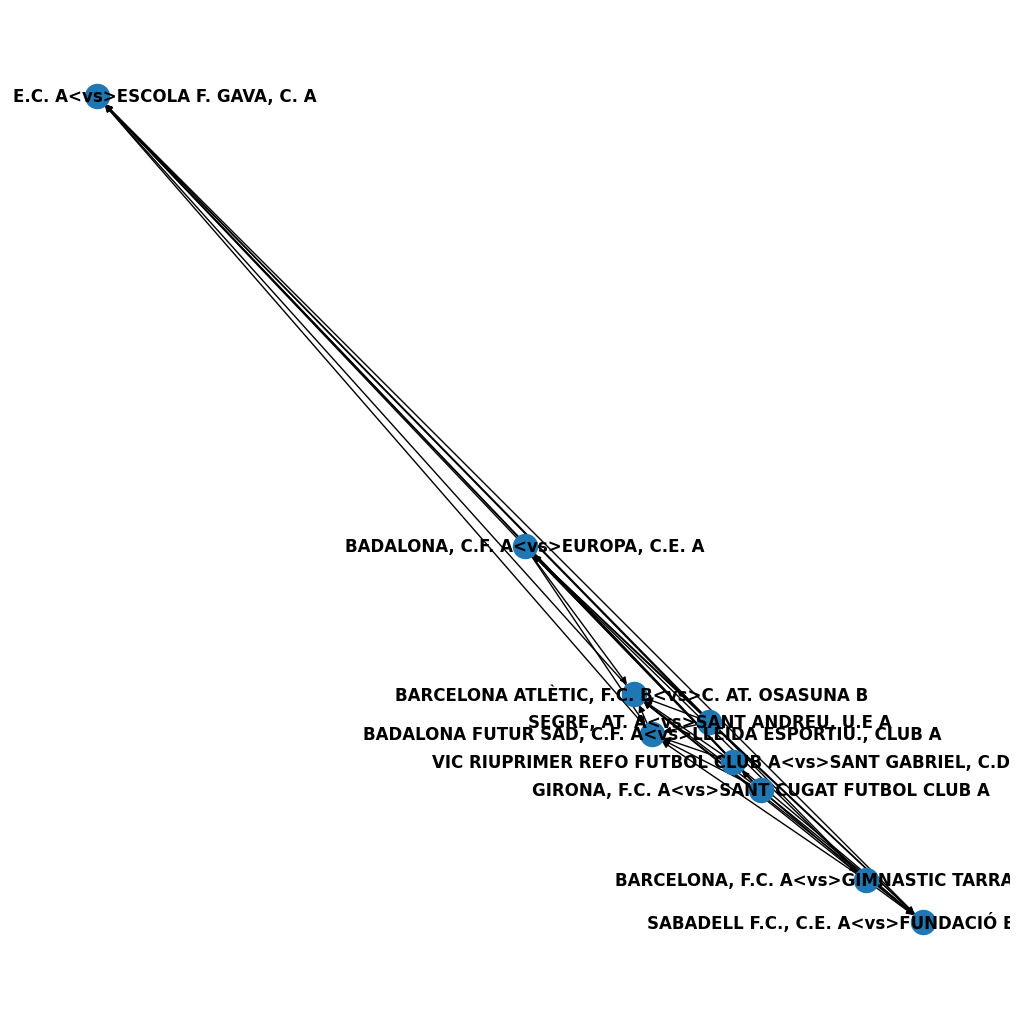

In [4]:
# Visualitzar el graf
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [5]:
nx.is_directed_acyclic_graph(G)

True

In [6]:
sink_nodes = [node for node, outdegree in G.out_degree(G.nodes()) if outdegree == 0]
source_nodes = [node for node, indegree in G.in_degree(G.nodes()) if indegree == 0]

print(f'sink nodes: {sink_nodes}')
print(f'source nodes: {source_nodes}')

sink nodes: ['GRANOLLERS, E.C. A<vs>ESCOLA F. GAVA, C. A']
source nodes: ['GIRONA, F.C. A<vs>SANT CUGAT FUTBOL CLUB A', 'SEGRE, AT. A<vs>SANT ANDREU, U.E A']


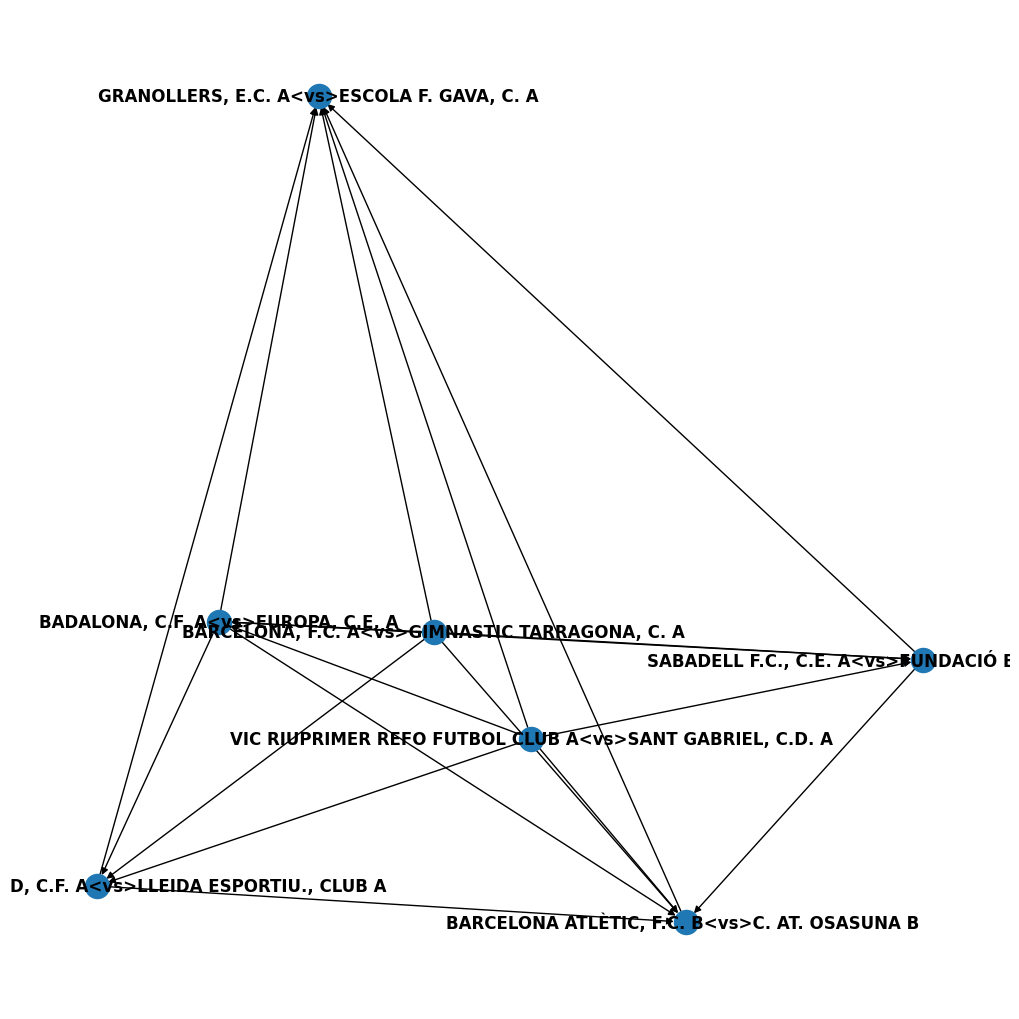

In [7]:
gr = nx.DiGraph()
gr.add_nodes_from(G.nodes())
gr.add_edges_from(G.edges())
gr.remove_nodes_from(source_nodes)
# Visualitzar el graf
plt.figure(figsize=(10, 10))
nx.draw(gr, with_labels=True, font_weight='bold')
plt.show()

In [11]:
matchday = MatchDayGraph(saturday)
# source_nodes = [node for node, indegree in matchday.graph.in_degree(matchday.graph.nodes()) if indegree == 0]
# matchday.graph.remove_nodes_from(source_nodes)
# matchday.graph.nodes['BADALONA FUTUR SAD, C.F. A-LLEIDA ESPORTIU., CLUB A']['weight'] = 100
routes = matchday.routes(origin=(41.500794, 1.813840), departure_time='8:00', wanted_matches=[
                       'BADALONA FUTUR SAD, C.F. A<vs>LLEIDA ESPORTIU., CLUB A'])
len(routes)

2

In [12]:
routes

[[GIRONA, F.C. A - SANT CUGAT FUTBOL CLUB A,
  VIC RIUPRIMER REFO FUTBOL CLUB A - SANT GABRIEL, C.D. A,
  BADALONA, C.F. A - EUROPA, C.E. A,
  BADALONA FUTUR SAD, C.F. A - LLEIDA ESPORTIU., CLUB A,
  BARCELONA ATLÈTIC, F.C. B - C. AT. OSASUNA B ,
  GRANOLLERS, E.C. A - ESCOLA F. GAVA, C. A],
 [GIRONA, F.C. A - SANT CUGAT FUTBOL CLUB A,
  BARCELONA, F.C. A - GIMNASTIC TARRAGONA, C. A,
  BADALONA, C.F. A - EUROPA, C.E. A,
  BADALONA FUTUR SAD, C.F. A - LLEIDA ESPORTIU., CLUB A,
  BARCELONA ATLÈTIC, F.C. B - C. AT. OSASUNA B ,
  GRANOLLERS, E.C. A - ESCOLA F. GAVA, C. A]]